In [34]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [35]:
data = pdr.get_data_yahoo('RELIANCE.NS', start = '2022-1-1')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2388.198242,2502073
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2442.094971,5006225
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2453.520020,5373618
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2400.765869,6667483
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2420.138916,6051239
...,...,...,...,...,...,...
2023-08-22,2516.899902,2537.949951,2499.000000,2519.399902,2519.399902,3856522
2023-08-23,2524.199951,2542.850098,2516.949951,2522.199951,2522.199951,4758976
2023-08-24,2539.899902,2539.899902,2471.000000,2479.800049,2479.800049,7070010


In [36]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2388.198242,2502073
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2442.094971,5006225
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2453.520020,5373618
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2400.765869,6667483
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2420.138916,6051239


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2022-01-03 to 2023-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       410 non-null    float64
 1   High       410 non-null    float64
 2   Low        410 non-null    float64
 3   Close      410 non-null    float64
 4   Adj Close  410 non-null    float64
 5   Volume     410 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.4 KB


In [38]:
prices = data['Adj Close']
prices

Date
2022-01-03    2388.198242
2022-01-04    2442.094971
2022-01-05    2453.520020
2022-01-06    2400.765869
2022-01-07    2420.138916
                 ...     
2023-08-22    2519.399902
2023-08-23    2522.199951
2023-08-24    2479.800049
2023-08-25    2468.350098
2023-08-28    2443.750000
Name: Adj Close, Length: 410, dtype: float64

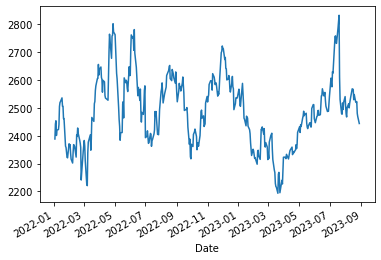

In [39]:
prices.plot()
plt.show()

In [40]:
prices = prices.to_frame()

In [41]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2022-01-03,2388.198242,NaN
2022-01-04,2442.094971,NaN
2022-01-05,2453.520020,NaN
2022-01-06,2400.765869,NaN
2022-01-07,2420.138916,NaN
...,...,...
2023-08-22,2519.399902,2541.244768
2023-08-23,2522.199951,2538.961356
2023-08-24,2479.800049,2526.335938


Calculating the Beta of the stock and then the expected rate of return and finally the sharpe ratio.

In [42]:
tickers = ['RELIANCE.NS','^NSEI']
data3 = pd.DataFrame()
for t in tickers:
    data3[t] = pdr.get_data_yahoo(t, start = '2022-1-1')['Adj Close']
data3

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,RELIANCE.NS,^NSEI
Date,,
2022-01-03,2388.198242,17625.699219
2022-01-04,2442.095215,17805.250000
2022-01-05,2453.520020,17925.250000
2022-01-06,2400.765869,17745.900391
2022-01-07,2420.138916,17812.699219
...,...,...
2023-08-22,2519.399902,19396.449219
2023-08-23,2522.199951,19444.000000
2023-08-24,2479.800049,19386.699219


In [43]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,RELIANCE.NS,^NSEI
Date,,
2022-01-03,NaN,NaN
2022-01-04,0.022317,0.010135
2022-01-05,0.004667,0.006717
2022-01-06,-0.021736,-0.010056
2022-01-07,0.008037,0.003757
...,...,...
2023-08-22,-0.000238,0.000147
2023-08-23,0.001111,0.002449
2023-08-24,-0.016954,-0.002951


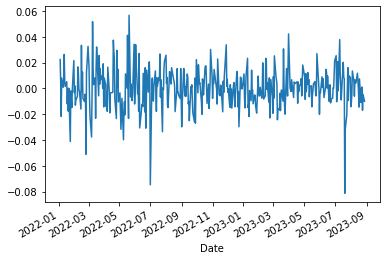

In [44]:
log_rets['RELIANCE.NS'].plot()
plt.show()

On average, the stockmarket opens on 250 days in a year

In [45]:
cov = log_rets.cov()*250
cov

,RELIANCE.NS,^NSEI
RELIANCE.NS,0.060643,0.023597
^NSEI,0.023597,0.021613


In [46]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.02359732389312168

In [47]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.021613439559892693

In [48]:
rel_beta = cov_with_market/market_var
rel_beta

1.0917893853836393

Calculating Free Risk Premium

In [49]:
rfm = log_rets['^NSEI'].mean()*250
rfm

0.05566047607631895

In [50]:
exp_ret = 0.0675 + rel_beta*(rfm - 0.0675)
exp_ret

0.054573733452129375

Sharpe Ratio

In [51]:
sr = (exp_ret - 0.0675)/(log_rets['RELIANCE.NS'].std()*250**0.5)
sr

-0.05249072000292731

Monte Carlo Simulation on Reliance Stock

In [52]:
from scipy.stats import norm
rel_mean_d = log_rets['RELIANCE.NS'].mean()
rel_var_d = log_rets['RELIANCE.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = rel_mean_d + 0.5*rel_var_d
drift

0.00017750749420164324

In [53]:
rel_std = log_rets['RELIANCE.NS'].std()

drift = np.array(drift)
rel_std = np.array(rel_std)

In [54]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + rel_std*norm.ppf(x))

In [55]:
S0 = data3['RELIANCE.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[2443.75, 2443.75, 2443.75, ..., 2443.75, 2443.75, 2443.75],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

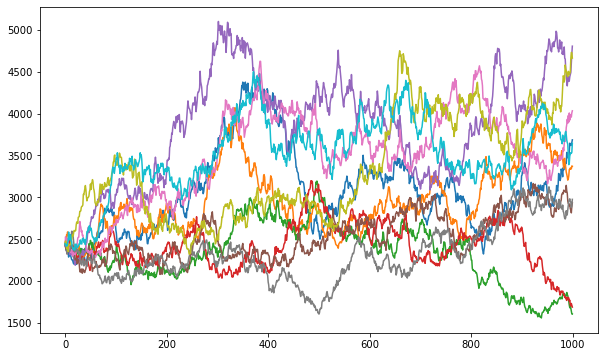

In [56]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)